# Stroke Dataset - EDA
By: Sachini Cali

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preprocessing

In [217]:
#read data file
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

#create dataframe
df = pd.DataFrame(data=data)
#print dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [218]:
#summerize data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [219]:
# look at dataset information including columns, data type, and non-null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [220]:
# count number of rows with missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Data cleaning**

In [221]:
# Data cleaning. Fill NaNs in bmi with mean of bmi for stroke=0 and stroke=1.
tstroke = df[df.stroke == 1]
fstroke = df[df.stroke == 0]
t_bmi_mean = tstroke.bmi.mean()
f_bmi_mean = fstroke.bmi.mean()
tstroke = tstroke.fillna(t_bmi_mean)
fstroke = fstroke.fillna(f_bmi_mean)
df = pd.concat([tstroke, fstroke], axis=0)
df['bmi'] = df['bmi'].round(2)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.47,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.82,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [222]:
# count number of rows with missing values for each column
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Distributions**

Text(0.5, 1.0, 'Distribution of age - no stroke')

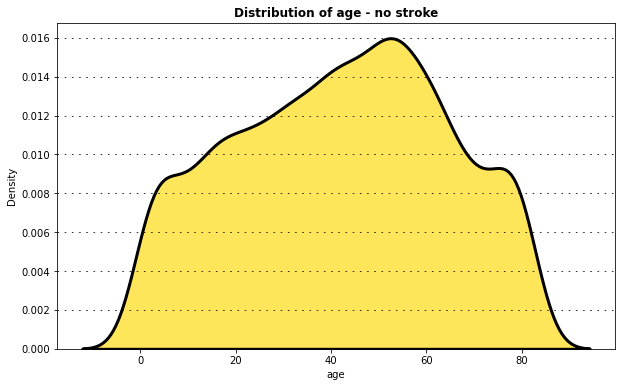

In [223]:
fig=plt.figure(figsize=(10,6),facecolor='white')
sns.kdeplot(data=df[df.stroke==0].age, shade=True, color='gold', alpha=0.65, linewidth=3, edgecolor='black')
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))     
plt.title('Distribution of age - no stroke', fontweight='bold')

Text(0.5, 1.0, 'Distribution of age - stroke')

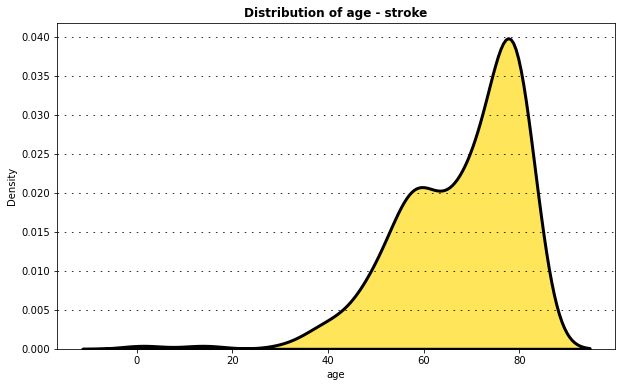

In [224]:
fig=plt.figure(figsize=(10,6),facecolor='white')
sns.kdeplot(data=df[df.stroke==1].age, shade=True, color='gold', alpha=0.65, linewidth=3, edgecolor='black')
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))     
plt.title('Distribution of age - stroke', fontweight='bold')

Text(0.5, 1.0, 'Distribution of average glucose level - no stroke')

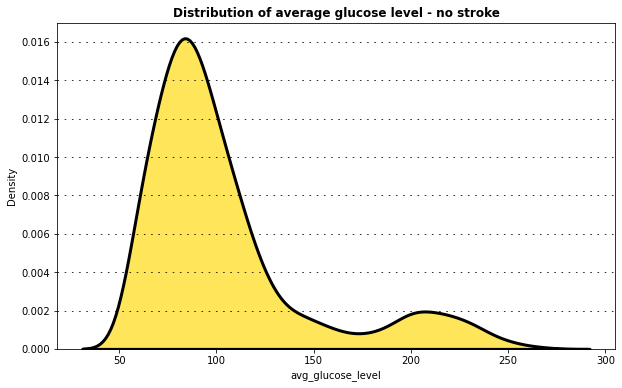

In [225]:
fig=plt.figure(figsize=(10,6),facecolor='white')
sns.kdeplot(data=df[df.stroke==0].avg_glucose_level, shade=True, color='gold', alpha=0.65, linewidth=3, edgecolor='black')
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))     
plt.title('Distribution of average glucose level - no stroke', fontweight='bold')

Text(0.5, 1.0, 'Distribution of average glucose level - stroke')

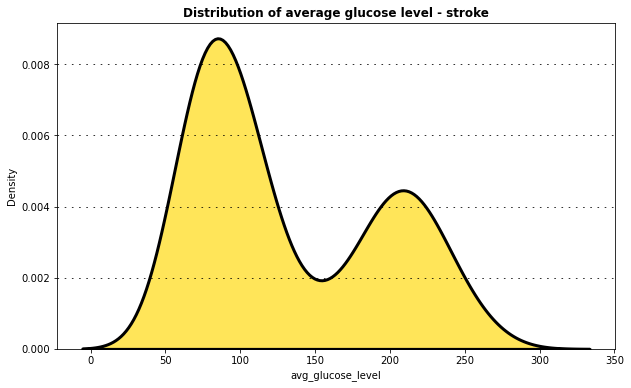

In [226]:
fig=plt.figure(figsize=(10,6),facecolor='white')
sns.kdeplot(data=df[df.stroke==1].avg_glucose_level, shade=True, color='gold', alpha=0.65, linewidth=3, edgecolor='black')
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))     
plt.title('Distribution of average glucose level - stroke', fontweight='bold')

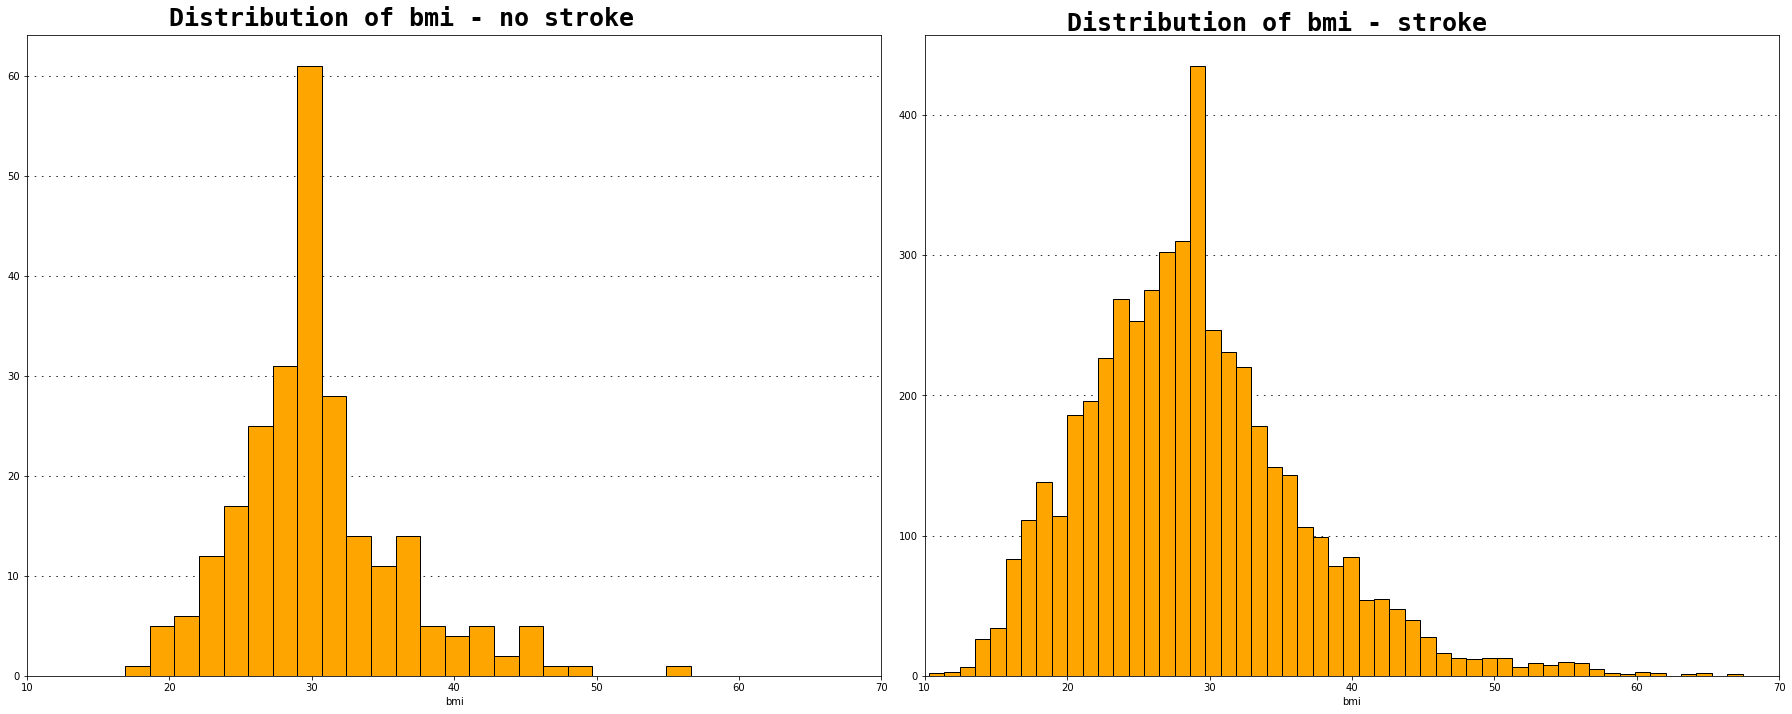

In [227]:
fig=plt.figure(figsize=(25,10),facecolor='white')
gs=fig.add_gridspec(1,2)
ax=[None for i in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(20,65,'Distribution of bmi - no stroke',fontsize=25,fontweight='bold', fontfamily='monospace')
ax[1].text(20,460,'Distribution of bmi - stroke',fontsize=25,fontweight='bold', fontfamily='monospace')

sns.histplot(x=df[df.stroke==1].bmi,ax=ax[0], color='orange', alpha=1,zorder=2,linewidth=1,edgecolor='black')
sns.histplot(x=df[df.stroke==0].bmi,ax=ax[1], color='orange', alpha=1,zorder=2,linewidth=1,edgecolor='black')

for i in range(2):
    ax[i].set_ylabel('')
    ax[i].grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(True)
        
ax[0].set_xlim(10,70)
ax[1].set_xlim(10,70)
        
plt.tight_layout()

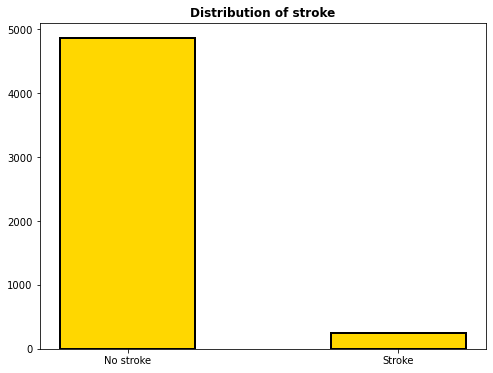

In [228]:
stroke = df['stroke'].value_counts()
status = ['No stroke','Stroke']
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(status, stroke,  color='gold', width=0.5, alpha=1, linewidth=2, edgecolor='black')
ax.set_title(f'Distribution of stroke', fontweight='bold')
plt.show()

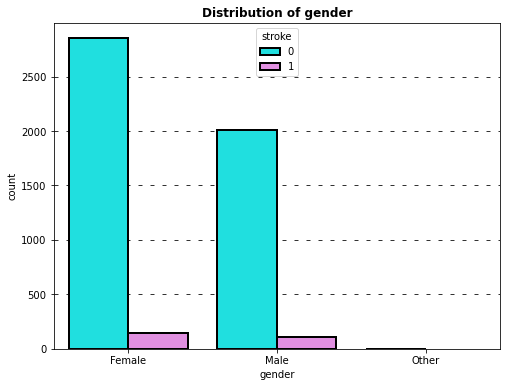

In [229]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df,x='gender',hue='stroke',order=['Female','Male','Other'],zorder=2,
                   linewidth=2,edgecolor='black', palette=["aqua","violet"])
ax.set_title(f'Distribution of gender', fontweight='bold')
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
plt.show()

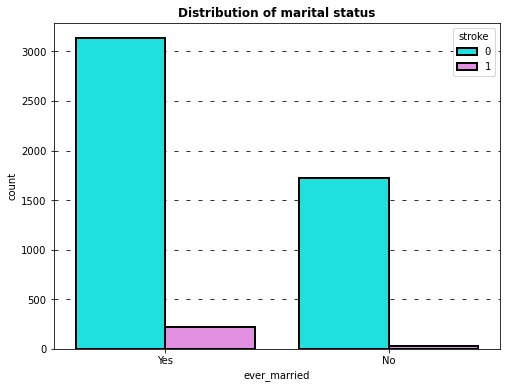

In [230]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df,x='ever_married',hue='stroke',zorder=2,
                   linewidth=2,edgecolor='black', palette=["aqua","violet"])
ax.set_title(f'Distribution of marital status', fontweight='bold')
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
plt.show()

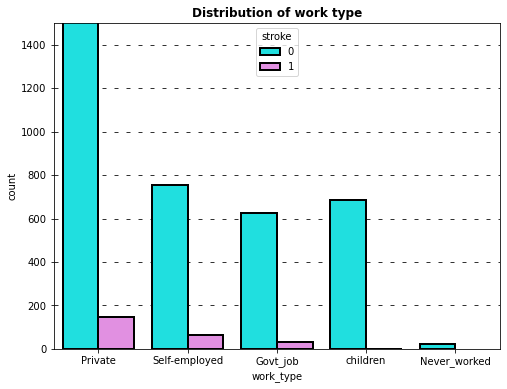

In [231]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df, x='work_type', hue='stroke', zorder=2,
                   linewidth=2, edgecolor='black', palette=["aqua","violet"])
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
ax.set_title(f'Distribution of work type', fontweight='bold')
ax.set_ylim(0,1500)
plt.show()

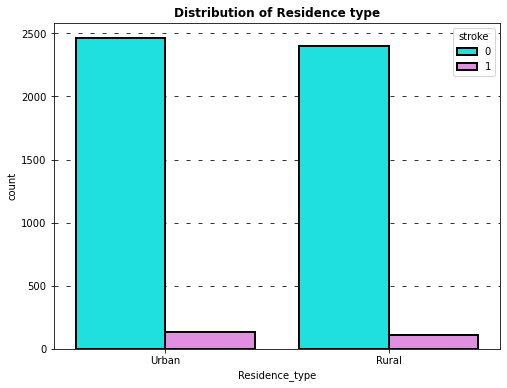

In [232]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df, x='Residence_type', hue='stroke', zorder=2,
                   linewidth=2, edgecolor='black', palette=["aqua","violet"])
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
ax.set_title(f'Distribution of Residence type', fontweight='bold')
plt.show()

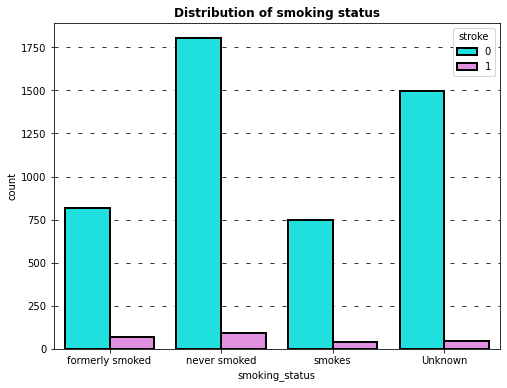

In [233]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df, x='smoking_status', hue='stroke', zorder=2,
                   linewidth=2, edgecolor='black', palette=["aqua","violet"])
ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(5,10))
ax.set_title(f'Distribution of smoking status', fontweight='bold')
plt.show()

**Transform categorical to numerical values**

In [234]:
#drop outlier: 1 row where gender = Other
df = df[df.gender != 'Other']
#transform categorical to numerical values
df = df.replace({'smoking_status' : { 'never smoked' : 0, 'formerly smoked' : 1, 'smokes' : 2, 'Unknown' : 3}, 'gender':{'Female':0,'Male':1},'ever_married':{'Yes':1,'No':0},
            'work_type':{'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4},
                 'Residence_type':{'Urban':0,'Rural':1}})
#Data transformation by attribute construction
#create columns for bmi categories with binary values to make mining more efficient
df.loc[(df.bmi < 18.5), ['underweight']] = 1
df.loc[(df.bmi >= 18.5) & (df.bmi < 25.0), ['normal']] = 1
df.loc[(df.bmi >= 25.0) & (df.bmi < 30.0), ['overweight']] = 1
df.loc[(df.bmi >= 30.0), ['obese']] = 1
df = df.fillna(0) #replace NaNs with 0
#transform column types to int64
df = df.astype({'underweight':'int64','normal':'int64','overweight':'int64','obese':'int64','age':'int64'})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
0,9046,1,67,0,1,1,0,0,228.69,36.60,1,1,0,0,0,1
1,51676,0,61,0,0,1,1,1,202.21,30.47,0,1,0,0,0,1
2,31112,1,80,0,1,1,0,1,105.92,32.50,0,1,0,0,0,1
3,60182,0,49,0,0,1,0,0,171.23,34.40,2,1,0,0,0,1
4,1665,0,79,1,0,1,1,1,174.12,24.00,0,1,0,1,0,0


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   int64  
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
 12  underweight        5109 non-null   int64  
 13  normal             5109 non-null   int64  
 14  overweight         5109 non-null   int64  
 15  obese              5109 non-null   int64  
dtypes: float64(2), int64(14)

**Remove outliers**

In [236]:
#search for id of outliers
df.loc[(df.bmi > 80)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
2128,56420,1,17,1,0,0,0,1,61.67,97.6,3,0,0,0,0,1
4209,51856,1,38,1,0,1,0,1,56.90,92.0,0,0,0,0,0,1


In [237]:
df.loc[(df.bmi >50) & (df.stroke == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
113,41069,0,45,0,0,1,0,1,224.1,56.6,0,1,0,0,0,1


In [238]:
#remove outliers
df = df[df.id != 49669]

In [239]:
df = df[df.id != 41069]

**Dimensionality reduction - Feature selection**

In [240]:
#check correlation of attributes with stroke
correlation = df.corr()
correlation['stroke'].sort_values()

underweight         -0.056246
normal              -0.053334
smoking_status      -0.036972
work_type           -0.032524
Residence_type      -0.017243
overweight          -0.001846
id                   0.005728
gender               0.010577
bmi                  0.042940
obese                0.077530
ever_married         0.109313
hypertension         0.128956
avg_glucose_level    0.131263
heart_disease        0.135840
age                  0.247145
stroke               1.000000
Name: stroke, dtype: float64

In [241]:
#Drop irrelevent columns
df = df.drop(['id','work_type','Residence_type'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
0,1,67,0,1,1,228.69,36.60,1,1,0,0,0,1
1,0,61,0,0,1,202.21,30.47,0,1,0,0,0,1
2,1,80,0,1,1,105.92,32.50,0,1,0,0,0,1
3,0,49,0,0,1,171.23,34.40,2,1,0,0,0,1
4,0,79,1,0,1,174.12,24.00,0,1,0,1,0,0


**Summary statistics of all respondents, no stroke, and stroke**

In [242]:
#summerization of all respondents, stroke or no stroke
df.describe().round(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
count,5107.00,5107.00,5107.0,5107.00,5107.00,5107.00,5107.00,5107.00,5107.00,5107.00,5107.00,5107.00,5107.00
mean,0.41,43.22,0.1,0.05,0.66,106.13,28.90,1.39,0.05,0.07,0.24,0.31,0.38
std,0.49,22.64,0.3,0.23,0.47,45.26,7.69,1.26,0.21,0.25,0.43,0.46,0.49
min,0.00,0.00,0.0,0.00,0.00,55.12,10.30,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,25.00,0.0,0.00,0.00,77.25,23.80,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,45.00,0.0,0.00,1.00,91.88,28.40,1.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,61.00,0.0,0.00,1.00,114.07,32.80,3.00,0.00,0.00,0.00,1.00,1.00
max,1.00,82.00,1.0,1.00,1.00,271.74,97.60,3.00,1.00,1.00,1.00,1.00,1.00


In [243]:
# extract data only where stroke = 0
no_stroke = df[df.stroke == 0]
#summerization of respondents who had a stroke
no_stroke.describe().round(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
count,4860.00,4860.00,4860.00,4860.00,4860.00,4860.00,4860.00,4860.00,4860.0,4860.00,4860.00,4860.00,4860.00
mean,0.41,41.96,0.09,0.05,0.64,104.79,28.82,1.40,0.0,0.07,0.25,0.31,0.37
std,0.49,22.31,0.28,0.21,0.48,43.85,7.78,1.26,0.0,0.25,0.43,0.46,0.48
min,0.00,0.00,0.00,0.00,0.00,55.12,10.30,0.00,0.0,0.00,0.00,0.00,0.00
25%,0.00,24.00,0.00,0.00,0.00,77.12,23.60,0.00,0.0,0.00,0.00,0.00,0.00
50%,0.00,43.00,0.00,0.00,1.00,91.46,28.30,1.00,0.0,0.00,0.00,0.00,0.00
75%,1.00,59.00,0.00,0.00,1.00,112.80,32.80,3.00,0.0,0.00,0.00,1.00,1.00
max,1.00,82.00,1.00,1.00,1.00,267.76,97.60,3.00,0.0,1.00,1.00,1.00,1.00


In [244]:
# extract data only where stroke = 1 (had stroke)
had_stroke = df[df.stroke == 1]
#summerization of respondents who had a stroke
had_stroke.describe().round(2)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,underweight,normal,overweight,obese
count,247.00,247.00,247.00,247.00,247.00,247.00,247.00,247.00,247.0,247.00,247.00,247.00,247.00
mean,0.44,68.04,0.27,0.19,0.89,132.48,30.36,1.18,1.0,0.00,0.14,0.30,0.55
std,0.50,12.23,0.44,0.39,0.32,61.71,5.58,1.12,0.0,0.06,0.35,0.46,0.50
min,0.00,1.00,0.00,0.00,0.00,56.11,16.90,0.00,1.0,0.00,0.00,0.00,0.00
25%,0.00,59.00,0.00,0.00,1.00,79.96,27.00,0.00,1.0,0.00,0.00,0.00,0.00
50%,0.00,71.00,0.00,0.00,1.00,105.22,30.47,1.00,1.0,0.00,0.00,0.00,1.00
75%,1.00,78.00,1.00,0.00,1.00,196.21,32.40,2.00,1.0,0.00,0.00,1.00,1.00
max,1.00,82.00,1.00,1.00,1.00,271.74,48.90,3.00,1.0,1.00,1.00,1.00,1.00


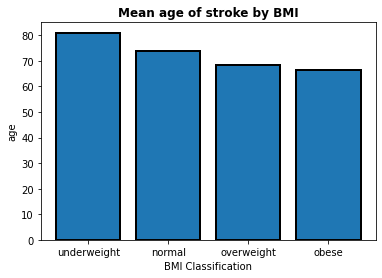

In [245]:
#bar plot of mean age of stroke by BMI categories
under_stroke_df = had_stroke[had_stroke.underweight == 1]
norm_stroke_df = had_stroke[had_stroke.normal == 1]
over_stroke_df = had_stroke[had_stroke.overweight == 1]
obese_stroke_df = had_stroke[had_stroke.obese == 1]
bar_titles = ['underweight','normal','overweight','obese']
ages= [under_stroke_df.age.mean(), norm_stroke_df.age.mean(), over_stroke_df.age.mean(), obese_stroke_df.age.mean()]
plt.bar(bar_titles,ages,linewidth=2,edgecolor='black')
plt.xlabel('BMI Classification')
plt.ylabel('age')
plt.title('Mean age of stroke by BMI',fontweight='bold')
plt.show()

*As BMI increases, the mean age of stroke decreases.*

-----------------------------------------------------------------------------------------------------------